In [1]:
import pandas as pd

#load the data
df = pd.read_csv('messy_mall_customers.csv')

#Preview the first 5 rows
df.head()

,CustomerID,Gender,Age,Income (k$),Spending Score,JoinDate,Notes,ZipCode
0,1052,F,45,41.21,65,2015-02,loyal customer,110011.0
1,2442,male,22,56.04,43,2018-12,NaN,NaN
2,1352,Male,34,86.52,48,2015-12,discount requested,110011.0
3,1353,Male,29,26.46,65,2015-12,NaN,NaN
4,1579,male,28,38.47,96,2016-08,VIP,NaN


Data cleaning
objective here.
- check for missing values
- Handle duplicates
- Fixing data types
- Cleaning inconsistent entries
- Removing irrelevant columns

In [2]:
#check for missing values
#import libraries
import pandas as pd
missing_values = df.isnull().sum()

print('Missing values in each column')
print(missing_values)

Missing values in each column
CustomerID          0
Gender            193
Age                 0
Income (k$)       102
Spending Score      0
JoinDate          154
Notes             363
ZipCode           655
dtype: int64


In [3]:
#check unique values in Gender
print(df['Gender'].unique())

#standardize Gender column
def clean_gender(g):
    if pd.isnull(g):
        return 'Unknown'
    g = g.strip().lower()
    if g in ['male', 'm']:
        return 'Male'
    elif g in ['female', 'f']:
        return 'Female'
    elif g == 'other':
        return 'Other'
    else:
        return 'Unkown'
df['Gender'] = df['Gender'].apply(clean_gender)

#verify cleaned values
print(df['Gender'].value_counts())

['F' 'male' 'Male' nan 'Female' 'Other' 'M' 'female']
Gender
Female     591
Male       578
Unknown    193
Other      188
Name: count, dtype: int64


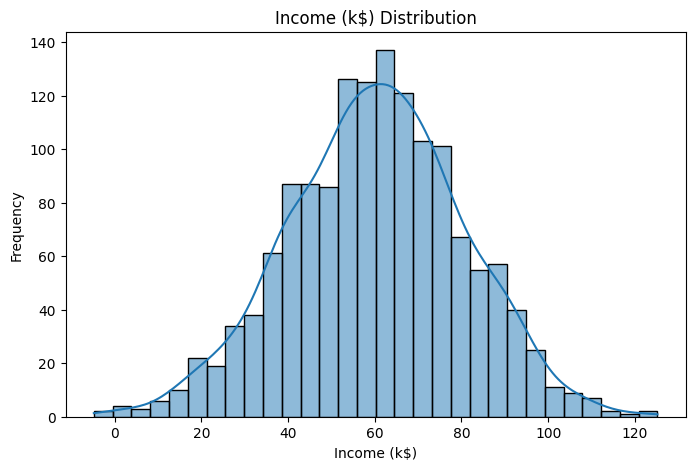

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot income distribution
plt.figure(figsize = (8,5))
sns.histplot(df['Income (k$)'], bins =30, kde = True)
plt.title('Income (k$) Distribution')
plt.xlabel('Income (k$)')
plt.ylabel('Frequency')
plt.show()

In [5]:
#impute missing income values with mean
mean_income = df['Income (k$)'].mean()
df['Income (k$)'] = df['Income (k$)'].fillna(mean_income)

#Confirm all missing values are removed
print(df['Income (k$)'].isnull().sum())

0
